In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DEBT_control_class import DEBT_Control_Protocol

In [2]:
params = dict()
params["custom"] = True
params["capacity_matrix"] = np.array([[0, 100, 100], [100, 0, 100], [100, 100, 0]])
params["price_update_step_size"] = 0.01

In [3]:
params["custom_routes"] = True
paths = dict()
empty_path = np.zeros((3, 3))
paths[(0,1)] = [empty_path.copy(), empty_path.copy()]
paths[(0,1)][0][0,1] = 1
paths[(0,1)][1][0,2] = 1
paths[(0,1)][1][2,1] = 1
paths[(1,2)] = [empty_path.copy(), empty_path.copy()]
paths[(1,2)][0][1,2] = 1
paths[(1,2)][1][1,0] = 1
paths[(1,2)][1][0,2] = 1
paths[(2,0)] = [empty_path.copy(), empty_path.copy()]
paths[(2,0)][0][2,0] = 1
paths[(2,0)][1][2,1] = 1
paths[(2,0)][1][1,0] = 1
params["routes"] = paths


In [5]:
demand_params = dict()
demand_params["custom"] = True
demand_params["demand_matrix"] = np.array([[0, 10, 0], [0, 0, 10], [10, 0, 0]])
demand_params["random"] = False
price_threshold = (3.0, 3.3)
myPCN = DEBT_Control_Protocol(params, demand_params, price_threshold)

Demand Matrix:
[[ 0 10  0]
 [ 0  0 10]
 [10  0  0]]


In [6]:
T = 100
n = 0
if params["custom"]:
    n = len(params["capacity_matrix"])
else:
    n = params["num_vertices"]

In [8]:
# create arrays to store flows and prices
flows_data = dict()
path_price_data = dict()
for i in range(n):
    for j in range(n):
        if (i,j) not in myPCN.paths.keys():
            continue
        flows_data[(i,j)] = np.zeros((T,len(myPCN.paths[(i,j)])))
        path_price_data[(i,j)] = np.zeros((T,len(myPCN.paths[(i,j)])))
edge_price_data = np.zeros((T, n, n))
reset_data = np.zeros((T, n, n))

0 1
1 2
2 0


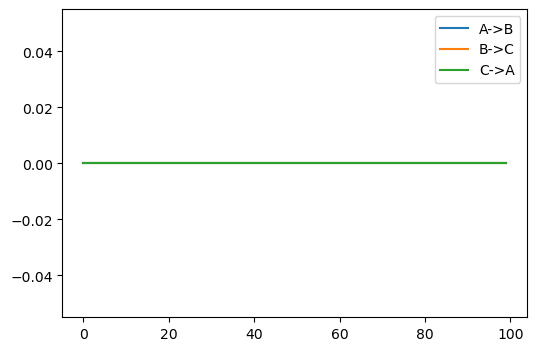

In [11]:
alphabets = ['A', 'B', 'C', 'D', 'E', 'F']
plt.close("all")
plt.figure(figsize=(6,4))
for i in range(n):
    for j in range(n):
        if myPCN.demands[i,j] > 0:
            print(i,j)
            plt.plot(np.sum(flows_data[(i,j)], axis=1), label = alphabets[i] + "->" + alphabets[j])
            # plt.plot(total_average(np.sum(flows_data[(i,j)], axis=1)), label = str(i) + "->" + str(j) + "flow; demand "+str(myFC.demands[i,j]))
            # plt.plot(np.sum(flows_data[(i,j)], axis=1), label = alphabets[i] + "->" + alphabets[j])
# plt.plot(flows_data[(0,1)][:,0], label = "short path", marker = 's', linestyle='none')
plt.legend()